<h2> Problem statement - Concrete Strength Prediction<h2>
<hr/>

<h3>Objective</h3>
To predict the concrete strength using the data available in file concrete_data.xls. Apply feature engineering and model tuning to obtain 85% to 95% accuracy.


<h3>Attribute Information:</h3>
Given are the variable name, variable type, the measurement unit and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.


<blockquote>
    <h5>Name -- Data Type -- Measurement -- Description</h5>
    <ul>
        <li>Cement (cement) -- quantitative -- kg in a m3 mixture -- Input Variable</li>
        <li>Blast Furnace Slag (slag) -- quantitative -- kg in a m3 mixture -- Input Variable</li>
        <li>Fly Ash (ash) -- quantitative -- kg in a m3 mixture -- Input Variable</li>
        <li>Water (water) -- quantitative -- kg in a m3 mixture -- Input Variable</li>
        <li>Superplasticizer (superplastic) -- quantitative -- kg in a m3 mixture -- Input Variable</li>
        <li>Coarse Aggregate (coarseagg) -- quantitative -- kg in a m3 mixture -- Input Variable</li>
        <li>Fine Aggregate (fineagg) -- quantitative -- kg in a m3 mixture -- Input Variable</li>
        <li>Age(age) -- quantitative -- Day (1~365) -- Input Variable</li>
        <li>Concrete compressive strength(strength) -- quantitative -- MPa -- Output Variable</li>
    </ul>
</blockquote>
<hr/>

In [ ]:
# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Model metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

#Preprocessor
from sklearn.preprocessing import StandardScaler

# Import linear, tree models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Import model tuning 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Other imports
from scipy.stats import randint as sp_randint


# To display matplot diagram in inline
%matplotlib inline

In [2]:
# To display all the variable values / full output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Ignore ipython warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read dataset 
df = pd.read_csv('concrete.csv')
df.shape # Shape of the dataset

(1030, 9)

In [4]:
df.head() # To display first 5 values
# We have to use linear regression technique to find the extact target value

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [5]:
df.info()
# all the values are continues values here, there is no categorical variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
df.nunique() #Number of unique values in each column
# Data distributed equally but values distribution inside the column will be handled in outlier checks 

cement          278
slag            185
ash             156
water           195
superplastic    111
coarseagg       284
fineagg         302
age              14
strength        845
dtype: int64

In [7]:
df.describe().transpose()
# Result of description explains us the data is some what distributed even except few columns (slag, ash, age etc.,)

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [8]:
df.isnull().sum().any() 
#check for null Values

False

In [9]:
df.query('age <= 0 | strength <= 0') # '0' in Age and strength are meaning less. result is empty, so there is no action needs to taken here

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength


In [10]:
df.dtypes # To check the feature datatypes
# From result, there is no categorical values in the dataset

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [11]:
df.corr()
# From below result, we understood that all the columns are Neutral Correlation

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


<Figure size 1080x576 with 0 Axes>

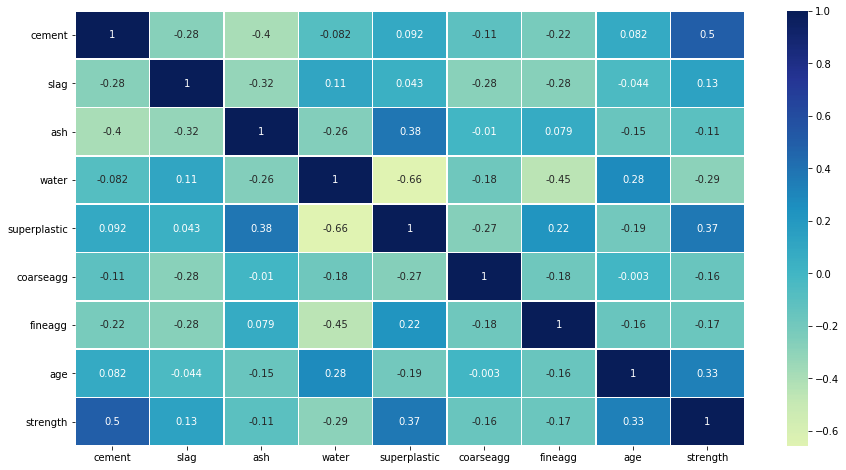

In [12]:
plt.figure(figsize=(15,8))

sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=True,
            cmap="YlGnBu")


From above heatmap, There are considerable positive correlation between few columns:
1. The amount of cement and strength
2. Super Plastic and Fly Ash and also 
3. Age is positively correlated with strength 

also, water and superplastic are negatively correlated

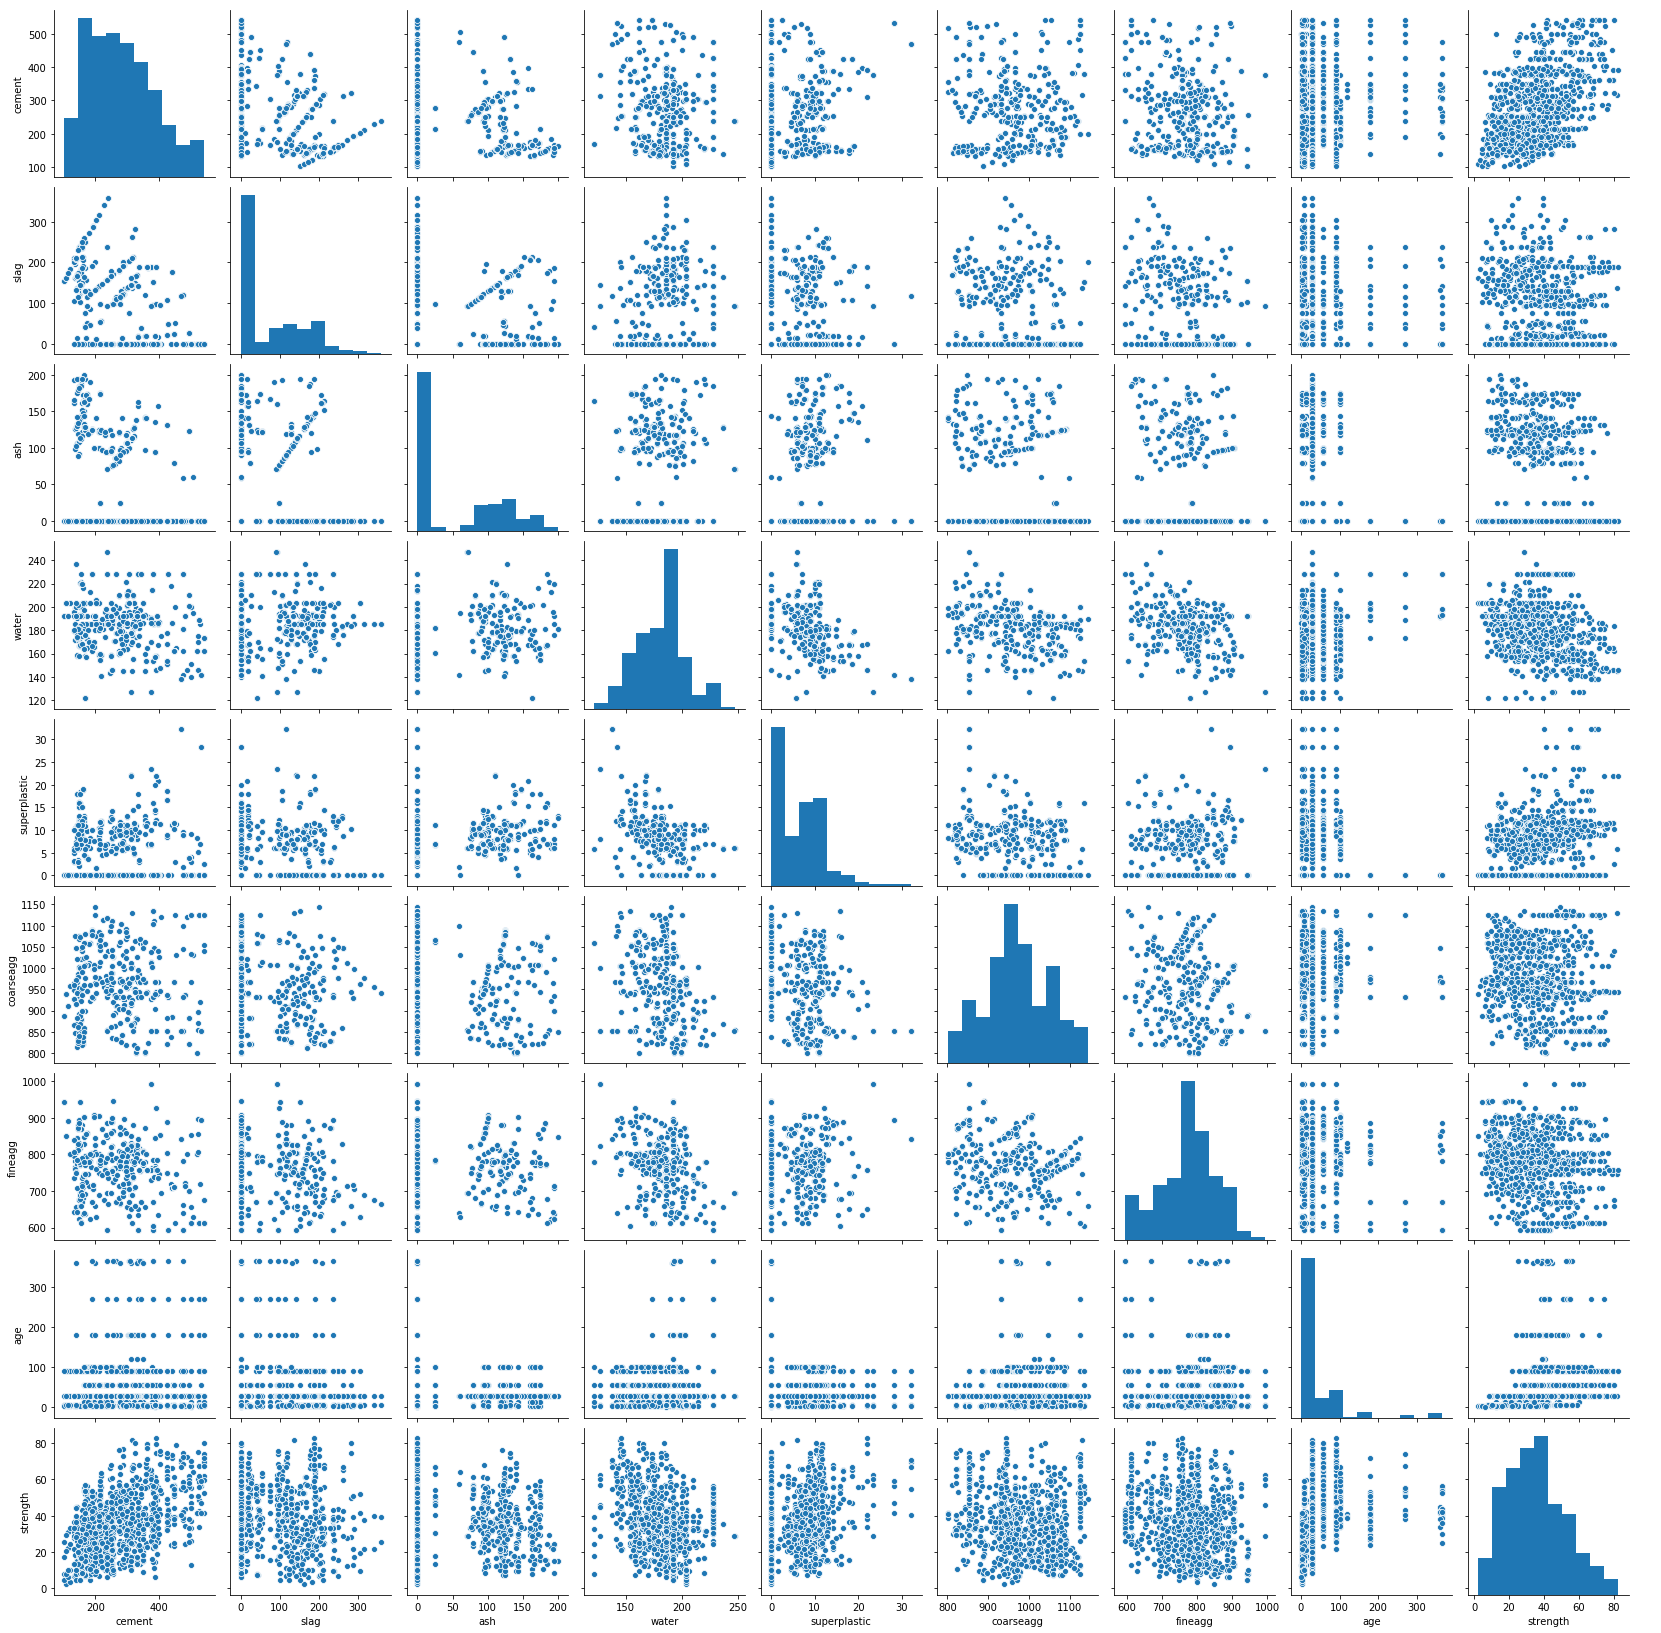

In [13]:
sns.pairplot(df, palette="husl")

From above pair plot, we can get a visual representation of correlations between all the features.
There are some observations,
* Strength increases if amount of cement increases
* Strength increases with age

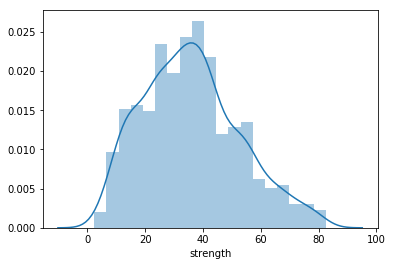

In [14]:
sns.distplot(df['strength'])

Distplot is a univariate distribution of observation, this is shows postive distribution of the data, let's check the skewness

In [15]:
print("Skewness = ",df['strength'].skew())

Skewness =  0.41697728841071807


From above diagram and score, this is lightly skewed on <b>positive</b> since skewness value is less than 0.5. 

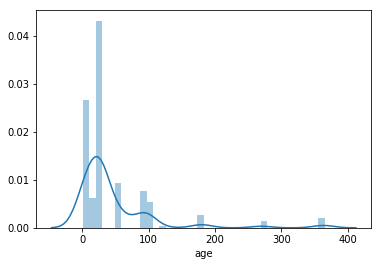

In [16]:
sns.distplot(df['age'])

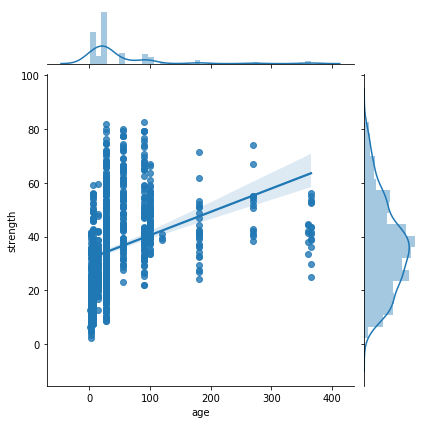

In [17]:
sns.jointplot(df['age'],df['strength'], kind='reg')

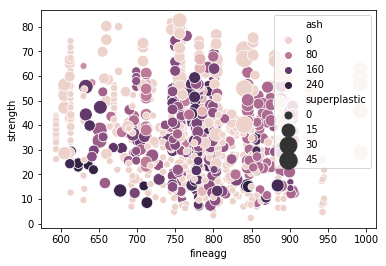

In [18]:

sns.scatterplot(y="strength", x="fineagg", hue="ash",
   size="superplastic", data=df, sizes=(50, 300))


Observations are from above scatterplot is
* Strength increases with superplastic
* Strength decreases when fly ash increase

## Common/Global methods
These methods are used commonly, moving these to separate section for easy access

In [19]:
# This function is used to get cross validation scores and model accuracy
def evaluate_model(model, test_feature, test_label):
    
    # Cross validation scores
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=5,
                             scoring='r2')
    
    # Get model accuracy
    accuracy = model.score(test_feature, test_label)
    
    # Get R2 and Mean
    y_pred = model.predict(test_feature) 
    r2_val = r2_score(test_label, y_pred)
    
    # RMSE - Root Mean Square Error
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    print('Accuracy: ', accuracy)
    print('R2 value: ', r2_val)
    print('RMSE: ', rmse)
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    
    #return [accuracy, r2_val, rmse, np.mean(scores), np.std(scores)]
    
    return { 'accuracy': round(accuracy,2), 'r2': round(r2_val,4), 'rmse':round(rmse,4), 'mean':round(np.mean(scores),4), 'std': round(np.std(scores),4)}

In [20]:
# These methods are used to handle the outliers
def outlier_treatment(df_in, datacolumn):
    sorted(datacolumn)
    #Q1,Q3 = np.percentile(datacolumn , [25,75])
    Q1 = df_in[datacolumn].quantile(0.25)
    Q3 = df_in[datacolumn].quantile(0.75)
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

def handle_outlier(df):
    for feature in df.drop(columns = 'strength').columns:
        lowerbound,upperbound = outlier_treatment(df, feature) #df[feature])
        print('Feature:%s, outlier length: %s' %(feature, len(df[(df[feature] < lowerbound) | (df[feature] > upperbound)])))
        if(len(df[(df[feature] < lowerbound) | (df[feature] > upperbound)]) > 0):
            df.drop(df[ (df[feature] > upperbound) | (df[feature] < lowerbound) ].index , inplace=True)
    return df

In [21]:
# This Method is used to store the model results in dataframe for future comparision
def save_results(result, resultsDf):
    tmpResultsDf = pd.DataFrame(result)
    resultsDf = pd.concat([resultsDf, tmpResultsDf])
    #resultsDf = resultsDf[['Method', 'accuracy','r2','std']]
    print(resultsDf.sort_values(by='accuracy',ascending=False).reset_index(drop=True))
    return resultsDf.sort_values(by='accuracy',ascending=False).reset_index(drop=True)

<h3> Check Outlier </h3>
The outlier can affect the model performance. 

<Figure size 1080x720 with 0 Axes>

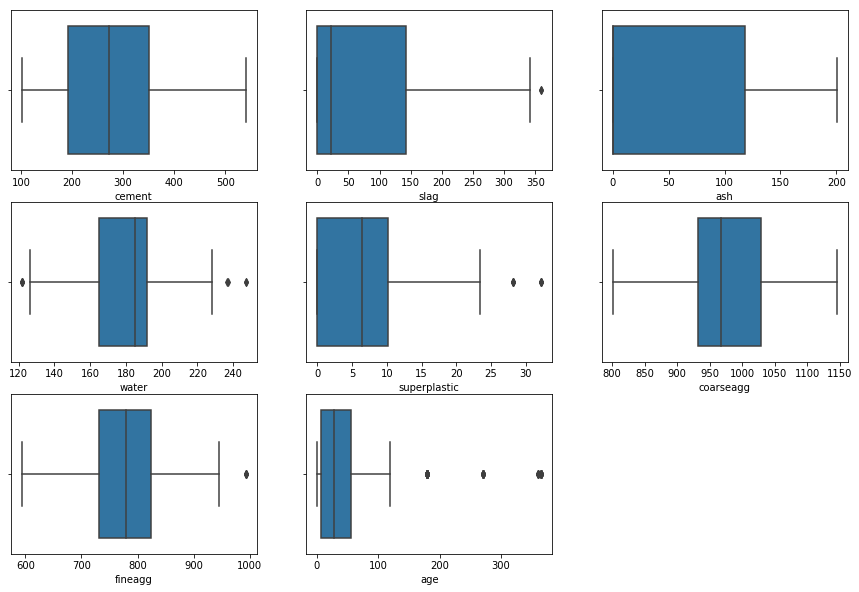

In [22]:
plt.figure(figsize=(15,10))
pos = 1
for i in df.drop(columns = 'strength').columns:
    plt.subplot(3, 3, pos)
    sns.boxplot(df[i])
    pos += 1 
    
# From below diagram, columns - slag, water, superplastic, finagg, age has outliers

This data has outlier, we can treat the outliers after checking initial model's performance. The result can be compared with and without outliers 

<h4>Split the Data into train and test in the ratio of 70:30</h4>

In [23]:
features = [col for col in df.columns if col != 'strength']

X_train, X_test, y_train, y_test = train_test_split(df[features], df['strength'], test_size=.30, random_state=1)
X_train.shape, X_test.shape
sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

((721, 8), (309, 8))

In [24]:
# invoke the LinearRegression function and find the bestfit model on training data
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
result = evaluate_model(regression_model, X_test, y_test)
result.update({'Method':['Linear Regression w/ outliers']})

Accuracy:  0.6339136715208276
R2 value:  0.6339136715208276
RMSE:  10.322092985364211
CV Mean:  0.5942714733006664
STD:  0.02088851820827946


In [26]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame(result)
resultsDf

,Method,accuracy,mean,r2,rmse,std
0,Linear Regression w/ outliers,0.63,0.5943,0.6339,10.3221,0.0209


Observation: the outlier points affected the Linear Regression model <b>(R² score is 63%, it's very less) </b> So let's remove the outlier in all the columns.

<h4> Handling Outliers </h4>

In [27]:
print('Shape of dataset with outlier:', df.shape)
print('Outlier count ---')
df_modified = handle_outlier(df)
print('Shape of dataset without outlier: ',df_modified.shape)

Shape of dataset with outlier: (1030, 9)
Outlier count ---
Feature:cement, outlier length: 0
Feature:slag, outlier length: 2
Feature:ash, outlier length: 0
Feature:water, outlier length: 9
Feature:superplastic, outlier length: 10
Feature:coarseagg, outlier length: 0
Feature:fineagg, outlier length: 35
Feature:age, outlier length: 44
Shape of dataset without outlier:  (930, 9)


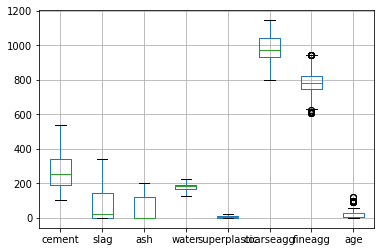

In [28]:
df_modified.drop('strength',axis=1).boxplot()

## 1. Linear Regression
Recreate the model with new dataset

In [29]:
# Data split
features = [col for col in df_modified.columns if col != 'strength']

X_train, X_test, y_train, y_test = train_test_split(df_modified[features], df_modified['strength'], test_size=.30, random_state=1)
X_train.shape, X_test.shape
sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

((651, 8), (279, 8))

In [30]:
# invoke the LinearRegression function and find the bestfit model on training data
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
print('accuracy on training:', regression_model.score(X_train,y_train))
print('accuracy on test:', regression_model.score(X_test,y_test))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

accuracy on training: 0.7873573838724119
accuracy on test: 0.7257908864628706


In [31]:
result = evaluate_model(regression_model, X_test, y_test)
result.update({'Method':['Linear Regression w/o outliers']})

Accuracy:  0.7257908864628706
R2 value:  0.7257908864628706
RMSE:  8.300445216949562
CV Mean:  0.7790806109513395
STD:  0.01878133417933666


In [32]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = save_results(result, resultsDf)

                           Method  accuracy    mean      r2     rmse     std
0  Linear Regression w/o outliers      0.73  0.7791  0.7258   8.3004  0.0188
1   Linear Regression w/ outliers      0.63  0.5943  0.6339  10.3221  0.0209


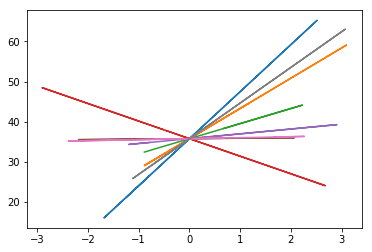

In [33]:
b1 = regression_model.coef_
b0 = regression_model.intercept_
plt.plot(X_train,b1*X_train+b0)

The model has been improved lot better by removing the outliers. <b>Model accuracy with outlier: 63%, model accuracy without outlier: 72% </b> Also the R² value increased from 59% to 76%

## Ridge Regression (L2 Regularization)
Ridge and Lasso regression techniques are optimized for predicition, let's try creating Lasso and Ridge regression

In [34]:
# Train model with default alpha=1
ridge = Ridge(alpha=.0009).fit(X_train, y_train)

# get scores
result = evaluate_model(ridge, X_test, y_test)
result.update({'Method':['Ridge Regression']})

Accuracy:  0.7257915988590913
R2 value:  0.7257915988590913
RMSE:  8.300434434649938
CV Mean:  0.7790806580552385
STD:  0.018781080469482916


In [35]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = save_results(result, resultsDf)

                           Method  accuracy    mean      r2     rmse     std
0  Linear Regression w/o outliers      0.73  0.7791  0.7258   8.3004  0.0188
1                Ridge Regression      0.73  0.7791  0.7258   8.3004  0.0188
2   Linear Regression w/ outliers      0.63  0.5943  0.6339  10.3221  0.0209


## Lasso Regression
Ridge and Lasso regression techniques are optimized for predicition, let's try creating Lasso and Ridge regression

In [36]:
# Train model with default alpha=1
lasso = Lasso(alpha=1).fit(X_train, y_train)

# get scores
result = evaluate_model(lasso, X_test, y_test)
result.update({'Method':['Lasso Regression']})

Accuracy:  0.6950903359377927
R2 value:  0.6950903359377927
RMSE:  8.752780549084143
CV Mean:  0.7508980192000764
STD:  0.018352017272740384


In [37]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = save_results(result, resultsDf)

                           Method  accuracy    mean      r2     rmse     std
0  Linear Regression w/o outliers      0.73  0.7791  0.7258   8.3004  0.0188
1                Ridge Regression      0.73  0.7791  0.7258   8.3004  0.0188
2                Lasso Regression      0.70  0.7509  0.6951   8.7528  0.0184
3   Linear Regression w/ outliers      0.63  0.5943  0.6339  10.3221  0.0209


There is no much difference in model performance of Linear, Ridge and Lasso algorithms. There is no strong prediction in the Linear approach

## 2. Decision Tree

The Decision Tree algorithm represent the data in a tree structure. This dataset has large number of features with less data. So Decision Tree may outperform Linear Regression.

In [38]:
dTree = DecisionTreeRegressor(max_depth=6) 
dTree.fit(X_train, y_train) 
print('Accuracy on Training set:', dTree.score(X_train, y_train))
print('Accuracy on Test set:', dTree.score(X_test, y_test))

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=6,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

Accuracy on Training set: 0.8876093800527611
Accuracy on Test set: 0.7304599101089445


In [39]:
# get scores
result = evaluate_model(dTree, X_test, y_test)
result.update({'Method':['Decision Tree']})

Accuracy:  0.7304599101089445
R2 value:  0.7304599101089445
RMSE:  8.229474987936463
CV Mean:  0.7717617630321867
STD:  0.03309678616146028


In [40]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = save_results(result, resultsDf)

                           Method  accuracy    mean      r2     rmse     std
0  Linear Regression w/o outliers      0.73  0.7791  0.7258   8.3004  0.0188
1                Ridge Regression      0.73  0.7791  0.7258   8.3004  0.0188
2                   Decision Tree      0.73  0.7718  0.7305   8.2295  0.0331
3                Lasso Regression      0.70  0.7509  0.6951   8.7528  0.0184
4   Linear Regression w/ outliers      0.63  0.5943  0.6339  10.3221  0.0209


The Decision Tree didn't improved the model accuracy, so let's try with Random Forests

## 3. Random Forests
Random Forests is an another type of regression and classification algorithm. This will fetch the data randomly to generate the Tree

In [41]:
rForest = RandomForestRegressor(n_estimators=100) 
rForest.fit(X_train, y_train) 
print('Accuracy on Training set:', rForest.score(X_train, y_train))
print('Accuracy on Test set:', rForest.score(X_test, y_test))

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Accuracy on Training set: 0.9835293653026463
Accuracy on Test set: 0.8877492067560594


In [42]:
# get scores
result = evaluate_model(rForest, X_test, y_test)
result.update({'Method':['Random Forest']})

Accuracy:  0.8877492067560594
R2 value:  0.8877492067560594
RMSE:  5.310741400425166
CV Mean:  0.9059866968889849
STD:  0.00721116102134356


In [43]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = save_results(result, resultsDf)

                           Method  accuracy    mean      r2     rmse     std
0                   Random Forest      0.89  0.9060  0.8877   5.3107  0.0072
1  Linear Regression w/o outliers      0.73  0.7791  0.7258   8.3004  0.0188
2                Ridge Regression      0.73  0.7791  0.7258   8.3004  0.0188
3                   Decision Tree      0.73  0.7718  0.7305   8.2295  0.0331
4                Lasso Regression      0.70  0.7509  0.6951   8.7528  0.0184
5   Linear Regression w/ outliers      0.63  0.5943  0.6339  10.3221  0.0209


The Random forest improved the performance lot better than other algorithms but it's overfitting the data by checking the accuracy on training data. so we need to prune
the tree.

## Feature Importance

Text(0, 0.5, 'Importance')

Text(0.5, 0, 'Features')

Text(0.5, 1.0, 'Feature Importance')

[Text(0, 0, 'cement'),
 Text(0, 0, 'slag'),
 Text(0, 0, 'ash'),
 Text(0, 0, 'water'),
 Text(0, 0, 'superplastic'),
 Text(0, 0, 'coarseagg'),
 Text(0, 0, 'fineagg'),
 Text(0, 0, 'age')]

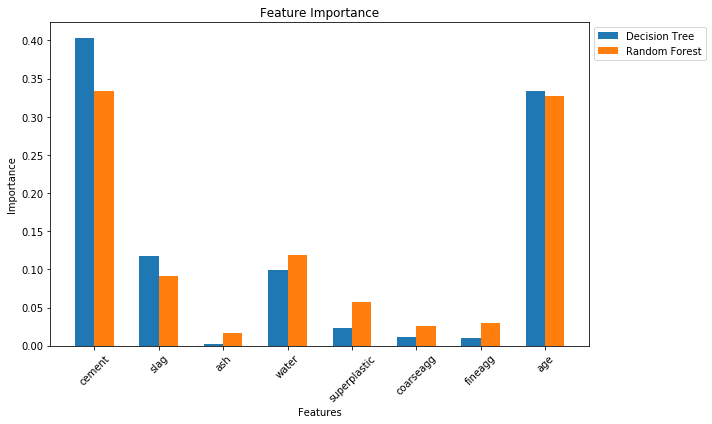

In [30]:
feature_dTree = dTree.feature_importances_ 
feature_rForest = rForest.feature_importances_ 
labels = df.columns[:-1] 
x = np.arange(len(labels)) 
width = 0.3 
fig, ax = plt.subplots(figsize=(10,6)) 
rects1 = ax.bar(x-(width/2), feature_dTree, width, label='Decision Tree') 
rects2 = ax.bar(x+(width/2), feature_rForest, width, label='Random Forest') 
ax.set_ylabel('Importance') 
ax.set_xlabel('Features') 
ax.set_title('Feature Importance') 
ax.set_xticks(x) 
ax.set_xticklabels(labels, rotation=45) 
ax.legend(loc="upper left", bbox_to_anchor=(1,1)) 
fig.tight_layout() 
plt.show()


From above diagram, the cement, water and age features are performing major role in prediction

## 4. Ensemble Learning - AdaBoosting
Let's try to create the models with Ensemble techniques.

In [44]:
adaBoosting = AdaBoostRegressor(n_estimators = 1000, learning_rate=0.01, random_state=7)
adaBoosting = adaBoosting.fit(X_train, y_train)
print('Accuracy on Training set:', adaBoosting.score(X_train, y_train))
print('Accuracy on Test set:', adaBoosting.score(X_test, y_test))

Accuracy on Training set: 0.8071651391845205
Accuracy on Test set: 0.743657157688208


In [45]:
# get scores
result = evaluate_model(adaBoosting, X_test, y_test)
result.update({'Method':['AdaBoosting']})

Accuracy:  0.743657157688208
R2 value:  0.743657157688208
RMSE:  8.025480482299738
CV Mean:  0.7709490698751251
STD:  0.03024019632505717


In [46]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = save_results(result, resultsDf)

                           Method  accuracy    mean      r2     rmse     std
0                   Random Forest      0.89  0.9060  0.8877   5.3107  0.0072
1                     AdaBoosting      0.74  0.7709  0.7437   8.0255  0.0302
2  Linear Regression w/o outliers      0.73  0.7791  0.7258   8.3004  0.0188
3                Ridge Regression      0.73  0.7791  0.7258   8.3004  0.0188
4                   Decision Tree      0.73  0.7718  0.7305   8.2295  0.0331
5                Lasso Regression      0.70  0.7509  0.6951   8.7528  0.0184
6   Linear Regression w/ outliers      0.63  0.5943  0.6339  10.3221  0.0209


## 5. Ensemble Learning - GradientBoosting

In [47]:
gBoosting = GradientBoostingRegressor(n_estimators = 50, learning_rate = 0.1, random_state=22)
gBoosting = gBoosting.fit(X_train, y_train)
print('Accuracy on Training set:', gBoosting.score(X_train, y_train))
print('Accuracy on Test set:', gBoosting.score(X_test, y_test))

Accuracy on Training set: 0.9308395277902286
Accuracy on Test set: 0.8552446584488314


In [48]:
# get scores
result = evaluate_model(gBoosting, X_test, y_test)
result.update({'Method':['GradientBoosting']})

Accuracy:  0.8552446584488314
R2 value:  0.8552446584488314
RMSE:  6.030839135060488
CV Mean:  0.8843441074927734
STD:  0.014157309000265237


In [49]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = save_results(result, resultsDf)

                           Method  accuracy    mean      r2     rmse     std
0                   Random Forest      0.89  0.9060  0.8877   5.3107  0.0072
1                GradientBoosting      0.86  0.8843  0.8552   6.0308  0.0142
2                     AdaBoosting      0.74  0.7709  0.7437   8.0255  0.0302
3  Linear Regression w/o outliers      0.73  0.7791  0.7258   8.3004  0.0188
4                Ridge Regression      0.73  0.7791  0.7258   8.3004  0.0188
5                   Decision Tree      0.73  0.7718  0.7305   8.2295  0.0331
6                Lasso Regression      0.70  0.7509  0.6951   8.7528  0.0184
7   Linear Regression w/ outliers      0.63  0.5943  0.6339  10.3221  0.0209


## Comparision

<Figure size 1152x360 with 0 Axes>

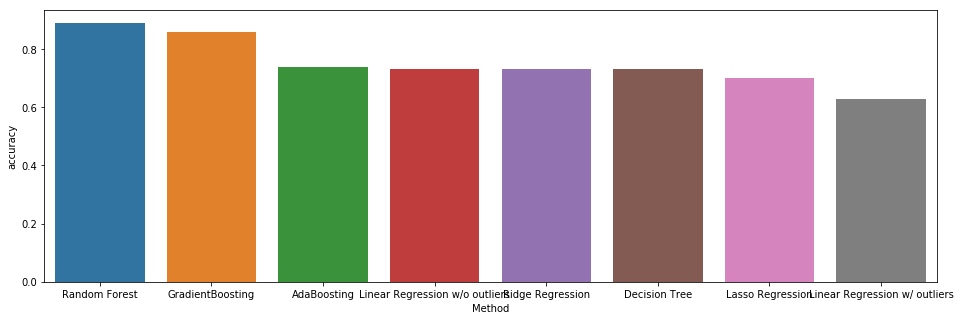

In [50]:
plt.figure(figsize=(16,5))
plt.xticks = True
sns.barplot(x=resultsDf['Method'], y=resultsDf['accuracy'])

In [51]:
resultsDf.sort_values(by='accuracy',ascending=False).reset_index(drop=True)

,Method,accuracy,mean,r2,rmse,std
0,Random Forest,0.89,0.9060,0.8877,5.3107,0.0072
1,GradientBoosting,0.86,0.8843,0.8552,6.0308,0.0142
2,AdaBoosting,0.74,0.7709,0.7437,8.0255,0.0302
3,Linear Regression w/o outliers,0.73,0.7791,0.7258,8.3004,0.0188
4,Ridge Regression,0.73,0.7791,0.7258,8.3004,0.0188
5,Decision Tree,0.73,0.7718,0.7305,8.2295,0.0331
6,Lasso Regression,0.70,0.7509,0.6951,8.7528,0.0184
7,Linear Regression w/ outliers,0.63,0.5943,0.6339,10.3221,0.0209


From above result, <b style='color:green;text-decoration:underline'>Random Forest and Gradient Boosting </b> algorithms are doing better than other algorithms. Let's finetune the model using GridSearchCV and RandomSearchCV

## Model tuning with GridSearchCV

In [36]:
# GridSearchCV for RandomForest algorithm

n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 
max_features = ['auto', 'sqrt']
bootstrap = [True, False]

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf, bootstrap = bootstrap, max_features = max_features)

gridF = GridSearchCV(rForest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
gridF = gridF.fit(X_train, y_train)
gridF.best_params_
gridF.best_score_

Fitting 3 folds for each of 2000 candidates, totalling 6000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:   54.0s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 3168 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 4018 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 4968 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 6000 out of 6000 | elapsed: 13.0min finished


{'bootstrap': True,
 'max_depth': 25,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

0.8958116190348574

In [60]:
# GridSearchCV for Gradient Boosting algorithm
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 
max_features = list(range(1,X_train.shape[1]))


hyperGB = dict(learning_rate = learning_rates, n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf, max_features = max_features)

gridGB = GridSearchCV(gBoosting, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
gridGB = gridF.fit(X_train, y_train)
gridGB.best_params_
gridGB.best_score_

Fitting 3 folds for each of 2000 candidates, totalling 6000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:   55.8s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 3168 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 4018 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 4968 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 6000 out of 6000 | elapsed: 15.7min finished


{'bootstrap': True,
 'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

0.8895377893371127

## Retrain the model using GridSearch hyper parameter

<h4>Random Forest </h4>

In [52]:
#rForest_pruned = RandomForestRegressor(max_depth = 12, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 1000, bootstrap = True) 
rForest_pruned = RandomForestRegressor(max_depth = 25, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 300, bootstrap = True, max_features = 'auto') 

rForest_pruned.fit(X_train, y_train)
print('Accuracy on Training set:', rForest_pruned.score(X_train, y_train))
print('Accuracy on Test set:', rForest_pruned.score(X_test, y_test))

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=25, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Accuracy on Training set: 0.9838487832163991
Accuracy on Test set: 0.8873999722802869


In [53]:
# get scores
result = evaluate_model(rForest_pruned, X_test, y_test)
result.update({'Method':['Pruned Random Forest']})

Accuracy:  0.8873999722802869
R2 value:  0.8873999722802869
RMSE:  5.318996369476676
CV Mean:  0.9067369462886854
STD:  0.0062232967272528635


In [54]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = save_results(result, resultsDf)

                           Method  accuracy    mean      r2     rmse     std
0                   Random Forest      0.89  0.9060  0.8877   5.3107  0.0072
1            Pruned Random Forest      0.89  0.9067  0.8874   5.3190  0.0062
2                GradientBoosting      0.86  0.8843  0.8552   6.0308  0.0142
3                     AdaBoosting      0.74  0.7709  0.7437   8.0255  0.0302
4  Linear Regression w/o outliers      0.73  0.7791  0.7258   8.3004  0.0188
5                Ridge Regression      0.73  0.7791  0.7258   8.3004  0.0188
6                   Decision Tree      0.73  0.7718  0.7305   8.2295  0.0331
7                Lasso Regression      0.70  0.7509  0.6951   8.7528  0.0184
8   Linear Regression w/ outliers      0.63  0.5943  0.6339  10.3221  0.0209


<h4>Gradient Boosting </h4>

In [55]:
gBoosting_Pruned = GradientBoostingRegressor(max_depth = 3, max_features = 'auto',
 min_samples_leaf = 1, min_samples_split = 2, n_estimators = 1000, learning_rate = 0.1, random_state=22)
gBoosting_Pruned = gBoosting_Pruned.fit(X_train, y_train)
print('Accuracy on Training set:', gBoosting_Pruned.score(X_train, y_train))
print('Accuracy on Test set:', gBoosting_Pruned.score(X_test, y_test))

Accuracy on Training set: 0.9922191015892792
Accuracy on Test set: 0.9172292855309827


In [56]:
# get scores
result = evaluate_model(gBoosting_Pruned, X_test, y_test)
result.update({'Method':['Pruned GradientBoosting']})

Accuracy:  0.9172292855309827
R2 value:  0.9172292855309827
RMSE:  4.56035652912065
CV Mean:  0.9199888542623013
STD:  0.01760604417467514


In [57]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = save_results(result, resultsDf)

                           Method  accuracy    mean      r2     rmse     std
0         Pruned GradientBoosting      0.92  0.9200  0.9172   4.5604  0.0176
1                   Random Forest      0.89  0.9060  0.8877   5.3107  0.0072
2            Pruned Random Forest      0.89  0.9067  0.8874   5.3190  0.0062
3                GradientBoosting      0.86  0.8843  0.8552   6.0308  0.0142
4                     AdaBoosting      0.74  0.7709  0.7437   8.0255  0.0302
5  Linear Regression w/o outliers      0.73  0.7791  0.7258   8.3004  0.0188
6                Ridge Regression      0.73  0.7791  0.7258   8.3004  0.0188
7                   Decision Tree      0.73  0.7718  0.7305   8.2295  0.0331
8                Lasso Regression      0.70  0.7509  0.6951   8.7528  0.0184
9   Linear Regression w/ outliers      0.63  0.5943  0.6339  10.3221  0.0209


## Model tuning with RandomizedSearchCV

In [77]:
# specify parameters and distributions to sample from
param_dist = {"max_depth": sp_randint(2,30),
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 110),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "n_estimators": sp_randint(100, 2000),
              "max_features": ['auto', 'sqrt']}
# run randomized search 
randomCV = RandomizedSearchCV(rForest, param_distributions=param_dist, n_iter=10) #default cv = 3
randomCV = randomCV.fit(X_train, y_train)


In [78]:
print(randomCV.best_params_)
randomCV.best_score_

{'max_depth': 11, 'n_estimators': 1545, 'bootstrap': False, 'min_samples_split': 21, 'min_samples_leaf': 10, 'max_features': 'sqrt'}


0.8103108499476903

In [79]:
# RandomSearchCV for Gradient Boosting algorithm

param_dist = {"learning_rate": [1, 0.5, 0.25, 0.1, 0.05, 0.01],
              "max_depth": sp_randint(2,30),
              "min_samples_split": sp_randint(2, 110),
              "min_samples_leaf": sp_randint(1, 11),
              "n_estimators": sp_randint(100, 2000),
              "max_features": ['auto', 'sqrt'],
              "loss" : ['ls', 'lad', 'huber', 'quantile']}


In [80]:
# run randomized search 
randomCVGB = RandomizedSearchCV(gBoosting, param_distributions=param_dist, n_iter=10) #default cv = 3
randomCVGB = randomCVGB.fit(X_train, y_train)

In [81]:
print(randomCVGB.best_params_)
randomCVGB.best_score_

{'loss': 'ls', 'max_depth': 17, 'n_estimators': 1207, 'learning_rate': 0.01, 'min_samples_split': 65, 'min_samples_leaf': 2, 'max_features': 'sqrt'}


0.9331243961189457

The Gradient Boosting showed improvement on accuracy, so let's retrain the model with above best params

## Retrain the model using RandomSearchCV hyper parameter

<h4>Gradient Boosting </h4>

In [58]:
gBoosting_Pruned1 = GradientBoostingRegressor(max_depth = 17, max_features = 'sqrt',
 min_samples_leaf = 5, min_samples_split = 46, n_estimators = 1445, learning_rate = 0.01, random_state=22)

gBoosting_Pruned1 = gBoosting_Pruned1.fit(X_train, y_train)

print('Accuracy on Training set:', gBoosting_Pruned1.score(X_train, y_train))
print('Accuracy on Test set:', gBoosting_Pruned1.score(X_test, y_test))

Accuracy on Training set: 0.990628316886424
Accuracy on Test set: 0.9257565841879658


Text(0.5, 0, 'Predicted')

Text(0, 0.5, 'True')

Text(0.5, 1.0, 'Gradient Boosting Regressor')

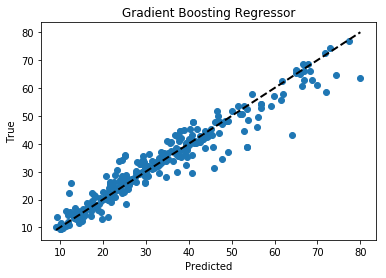

In [59]:
y_pred_gd = gBoosting_Pruned1.predict(X_test) 
plt.scatter(y_test, y_pred_gd) 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
plt.xlabel("Predicted") 
plt.ylabel("True") 
plt.title("Gradient Boosting Regressor")

Straight line fits the data

In [60]:
# get scores
result = evaluate_model(gBoosting_Pruned1, X_test, y_test)
result.update({'Method':['Pruned GradientBoosting - 2']})

Accuracy:  0.9257565841879658
R2 value:  0.9257565841879658
RMSE:  4.319061793200525
CV Mean:  0.9329891234351706
STD:  0.0098992922691676


In [61]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = save_results(result, resultsDf)

                            Method  accuracy    mean      r2     rmse     std
0      Pruned GradientBoosting - 2      0.93  0.9330  0.9258   4.3191  0.0099
1          Pruned GradientBoosting      0.92  0.9200  0.9172   4.5604  0.0176
2                    Random Forest      0.89  0.9060  0.8877   5.3107  0.0072
3             Pruned Random Forest      0.89  0.9067  0.8874   5.3190  0.0062
4                 GradientBoosting      0.86  0.8843  0.8552   6.0308  0.0142
5                      AdaBoosting      0.74  0.7709  0.7437   8.0255  0.0302
6   Linear Regression w/o outliers      0.73  0.7791  0.7258   8.3004  0.0188
7                 Ridge Regression      0.73  0.7791  0.7258   8.3004  0.0188
8                    Decision Tree      0.73  0.7718  0.7305   8.2295  0.0331
9                 Lasso Regression      0.70  0.7509  0.6951   8.7528  0.0184
10   Linear Regression w/ outliers      0.63  0.5943  0.6339  10.3221  0.0209


<hr/>
<h4>Conclusion:</h4>
    <blockquote>
        Created a model to predict the concrete strength using provided dataset concrete.csv. Applied feature engineering and model tuning. <b style='color:green;text-decoration:underline'>Gradient Boosting</b> with RandomSearchCV given high accuracy - <b style='color:green;text-decoration:underline'> obtained 93% accuracy.</b> and also RMSE, STD are less than other algorithms.
    </blockquote>


Accuracy:
    <blockquote>
    Model accuracy beween 0-1. sometimes it can go in negative too. 
    <div style='margin-top:10px'><b>current highest score: .93, which is good.</b></div>
    </blockquote>
    
Mean:
    <blockquote>
    Cross validation is one of the technique to evaluate the model. It produce the scores and Mean refers to mean value of the score. Again, this value between 0 to 1. 
    <div style='margin-top:10px'><b>current highest score: .933, which is good.</b></div>
    </blockquote>
R2:
    <blockquote>
        R2 (coefficient of determination) regression score function.
        Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.
    <div style='margin-top:10px'><b>current highest score: .93, which is good.</b></div>
    </blockquote>

RMSE:
    <blockquote>
        Root Mean Square Error - RMSE
        Mean squared error regression loss, The mean_squared_error function computes mean square error, a risk metric corresponding to the expected value of the squared (quadratic) error or loss. 
    <div style='margin-top:10px'><b>current lowest score: 4.31, the smaller the RMSE is better.</b></div>
    </blockquote>


## From Mentor session

* You can remove the unwanted or less contributed columns by checking feature
* use np.linspace(start=4, stop=8, num = 2) for generating random number in RandomSearchCV
* eg: max_depth = [int(x) for x in np.linspace(start = 4, stop = 8, num = 3)]